<a href="https://colab.research.google.com/github/sychun/colab/blob/master/h_nn_rnn_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# !wget http://nlp.stanford.edu/data/glove.6B.zip
# !unzip glove.6B.zip
# !head glove.6B.100d.txt
# ! rm -f glove.6B.zip
# ! rm -f glove.6B.300d.txt

In [7]:
import numpy as np

embeddings_index = {}
f = open(('glove.6B.100d.txt'), encoding="utf8")
for line in f:
    values = line.split()
    word = values[0] # 단어
    coefs = np.asarray(values[1:], dtype='float32') # 가중치
    embeddings_index[word] = coefs
f.close()

print('%s개의 단어 벡터를 찾았습니다.' % len(embeddings_index))

400000개의 단어 벡터를 찾았습니다.


In [8]:
print( embeddings_index['the'].shape)
print( embeddings_index['the'])

(100,)
[-0.038194 -0.24487   0.72812  -0.39961   0.083172  0.043953 -0.39141
  0.3344   -0.57545   0.087459  0.28787  -0.06731   0.30906  -0.26384
 -0.13231  -0.20757   0.33395  -0.33848  -0.31743  -0.48336   0.1464
 -0.37304   0.34577   0.052041  0.44946  -0.46971   0.02628  -0.54155
 -0.15518  -0.14107  -0.039722  0.28277   0.14393   0.23464  -0.31021
  0.086173  0.20397   0.52624   0.17164  -0.082378 -0.71787  -0.41531
  0.20335  -0.12763   0.41367   0.55187   0.57908  -0.33477  -0.36559
 -0.54857  -0.062892  0.26584   0.30205   0.99775  -0.80481  -3.0243
  0.01254  -0.36942   2.2167    0.72201  -0.24978   0.92136   0.034514
  0.46745   1.1079   -0.19358  -0.074575  0.23353  -0.052062 -0.22044
  0.057162 -0.15806  -0.30798  -0.41625   0.37972   0.15006  -0.53212
 -0.2055   -1.2526    0.071624  0.70565   0.49744  -0.42063   0.26148
 -1.538    -0.30223  -0.073438 -0.28312   0.37104  -0.25217   0.016215
 -0.017099 -0.38984   0.87424  -0.72569  -0.51058  -0.52028  -0.1459
  0.8278    0.

In [16]:
# !wget http://mng.bz/0tIo --no-check-certificate
# !mv 0tIo aclImdb.zip # 이름 변경
# !unzip aclImdb.zip
# !rm -f aclImdb.zip
# !ls -l

total 1183520
drwxr-xr-x 4 root root      4096 Nov 18  2017 aclImdb
-rw-rw-r-- 1 root root 347116733 Aug  4  2014 glove.6B.100d.txt
-rw-rw-r-- 1 root root 693432828 Aug  4  2014 glove.6B.200d.txt
-rw-rw-r-- 1 root root 171350079 Aug  4  2014 glove.6B.50d.txt
drwxrwxr-x 3 root root      4096 Nov 18  2017 __MACOSX
drwxr-xr-x 1 root root      4096 Sep 16 16:29 sample_data


In [17]:
import os

imdb_dir = './aclImdb'
train_dir = os.path.join(imdb_dir, 'train')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname), encoding='utf8')
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

test_dir = os.path.join(imdb_dir, 'test')

labels2 = []
texts2 = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(test_dir, label_type)
    for fname in sorted(os.listdir(dir_name)):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname), encoding="utf8")
            texts2.append(f.read())
            f.close()
            if label_type == 'neg':
                labels2.append(0)
            else:
                labels2.append(1)



# sequences2 = tokenizer.texts_to_sequences(texts2)
# x_test = pad_sequences(sequences2, maxlen=maxlen)
# y_test = np.asarray(labels2)

In [20]:
print(len(labels), labels[:5], labels[-5:])
print(len(texts))
texts[0]

25000 [0, 0, 0, 0, 0] [1, 1, 1, 1, 1]
25000


'Why else would he do this to me?<br /><br />Not that I expect Dean Cain to produce hit movies. Or even decent movies. I saw Lois and Clark, I am aware of just how... "good" Dean Cain is.<br /><br />Obviously this is gonna be a cheesey flick, and each cheesey flick has its own special way to make you scratch your head. I will not call these spoilers as you can\'t really spoil this movie any more than it already is.<br /><br />To begin with... why is that a fake helicopter? I mean... why?<br /><br />How come that one scientist is from Chicago and that other scientist is from LA and neither one could be any more eastern european if they tried? How hard would it have been to get either an american actor, or just change that lame state sheet the movie provides us with to say those people aren\'t american?<br /><br />Why are there 2 occasions when the movie gives us a slug line? We get helipad-day and then mess hall-day later on. And then that\'s it, who cares about the timeline. To be hone

In [21]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

maxlen = 100  # 100개 단어 이후는 버립니다
training_samples = 200  # 훈련 샘플은 200개입니다 (매우 적은 샘플이다!!!)
validation_samples = 10000  # 검증 샘플은 10,000개입니다
max_words = 10000  # 데이터셋에서 가장 빈도 높은 10,000개의 단어만 사용합니다

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts) # 문자열 -> 숫자 변경 학습
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('%s개의 고유한 토큰을 찾았습니다.' % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen) # ? x 100 행렬

labels = np.asarray(labels)
print('데이터 텐서의 크기:', data.shape)
print('레이블 텐서의 크기:', labels.shape)

# 데이터를 훈련 세트와 검증 세트로 분할합니다.
# 샘플이 순서대로 있기 때문에 (부정 샘플이 모두 나온 후에 긍정 샘플이 옵니다) 
# 먼저 데이터를 섞습니다.
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

sequences2 = tokenizer.texts_to_sequences(texts2)
x_test = pad_sequences(sequences2, maxlen=maxlen)
y_test = np.asarray(labels2)

88582개의 고유한 토큰을 찾았습니다.
데이터 텐서의 크기: (25000, 100)
레이블 텐서의 크기: (25000,)


In [43]:
# texts[0]
# sequences[0]
# data.shape
# data[0]
word_index['moscow']

18364

In [44]:
embedding_dim = 100

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            # 임베딩 인덱스에 없는 단어는 모두 0이 됩니다.
            embedding_matrix[i] = embedding_vector

In [45]:
import tensorflow as tf
import tensorflow.keras as keras

In [46]:
model = keras.models.Sequential()

#                               전체단어수, 학습될 단어별 속성 수, 입력 데이터에 포함될 단어 수. 출력: 100 x 100
model.add(keras.layers.Embedding(10000, 100, input_length=100))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_2 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


In [48]:
model.layers[0].set_weights([embedding_matrix]) # 이미 잘 학습된 가중치를 모델에 저장
model.layers[0].trainable = False # 이미 잘 학습되어 있으니, 첫 레이어는 train하지 말 것

In [49]:
model.compile(loss="binary_crossentropy", optimizer=keras.optimizers.RMSprop(0.01), metrics=['accuracy'])

In [50]:
history = model.fit(x_train, y_train, batch_size=128, epochs=10, validation_data=(x_val, y_val))

Epoch 1/10
2/2 [==============================] - 0s 180ms/step - loss: 27.6581 - accuracy: 0.4600 - val_loss: 14.3222 - val_accuracy: 0.5061
Epoch 2/10
2/2 [==============================] - 0s 127ms/step - loss: 12.0479 - accuracy: 0.4950 - val_loss: 9.9357 - val_accuracy: 0.5061
Epoch 3/10
2/2 [==============================] - 0s 116ms/step - loss: 7.8833 - accuracy: 0.4650 - val_loss: 8.4195 - val_accuracy: 0.5061
Epoch 4/10
2/2 [==============================] - 0s 124ms/step - loss: 4.2771 - accuracy: 0.5550 - val_loss: 3.7219 - val_accuracy: 0.5084
Epoch 5/10
2/2 [==============================] - 0s 118ms/step - loss: 0.6973 - accuracy: 0.8050 - val_loss: 1.2221 - val_accuracy: 0.5828
Epoch 6/10
2/2 [==============================] - 0s 117ms/step - loss: 0.0695 - accuracy: 0.9750 - val_loss: 1.1699 - val_accuracy: 0.5863
Epoch 7/10
2/2 [==============================] - 0s 119ms/step - loss: 0.0242 - accuracy: 0.9950 - val_loss: 1.2302 - val_accuracy: 0.5781
Epoch 8/10
2/2 [=

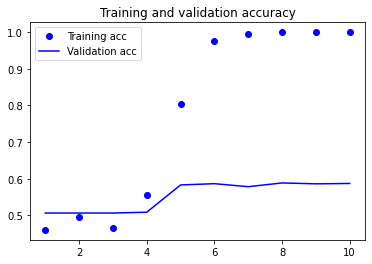

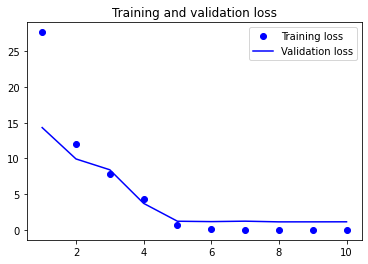

In [51]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()